In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())



Checking for missing values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Selecting relevant features for clustering
X = df.iloc[:, [3, 4]].values

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Train-Test Split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
print("\nData Split Successfully! Train Shape:", X_train.shape, "Test Shape:", X_test.shape)


Data Split Successfully! Train Shape: (160, 2) Test Shape: (40, 2)


In [7]:
# Apply K-Means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

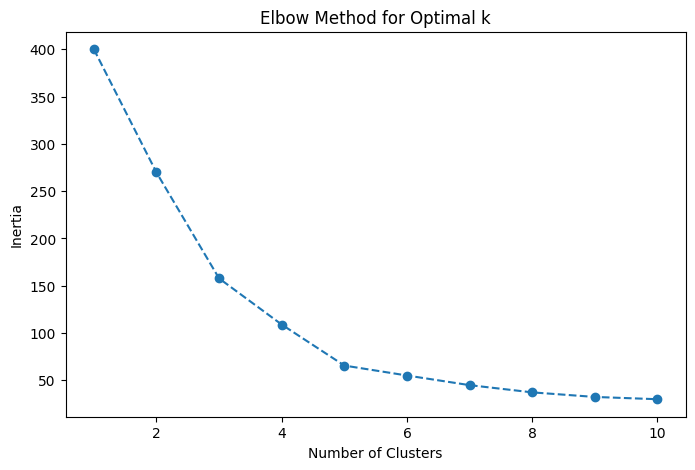

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
# Choosing k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)


In [10]:
# Evaluate Model using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print("\nSilhouette Score:", silhouette_avg)


Silhouette Score: 0.5546571631111091


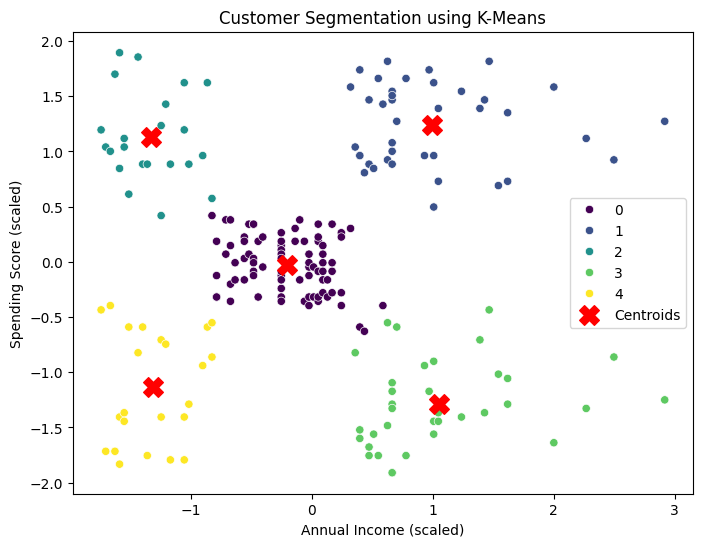


Clustering Completed Successfully!


In [11]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

print("\nClustering Completed Successfully!")
